0 65535


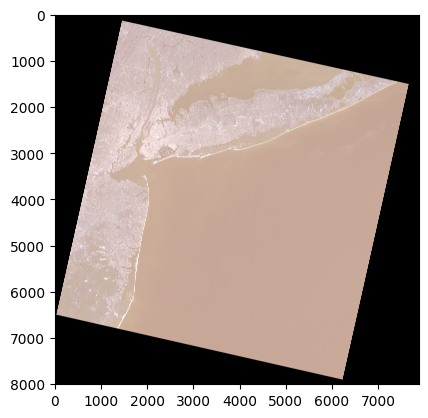

In [1]:
# Imports
from osgeo import gdal 

import numpy as np
import matplotlib.pyplot as plt

import glob
#Load first image
img = gdal.Open('NYC_Image.tif').ReadAsArray()
img.shape #(12,256,256)
rgb = img[[3,2,1]].transpose(1,2,0)
print(rgb.min(),rgb.max()) #150 8,600
rgb = np.clip(rgb/10000,0,1)
plt.imshow(rgb)

In [11]:
def visualise_rgb(img,clip=[0.3,0.3,0.3],display=True):
        """Visulaise RGB image with given clip values and return image"""

        # Scale image
        img = np.clip(img/10000,0,1)
        
        # Get RGB channels
        rgb = img[[3,2,1]]

        #clip rgb values
        rgb[0] = np.clip(rgb[0],0,clip[0])/clip[0]
        rgb[1] = np.clip(rgb[1],0,clip[1])/clip[1]
        rgb[2] = np.clip(rgb[2],0,clip[2])/clip[2]

        rgb = rgb.transpose(1,2,0)

        if display:

                #Display histograms of pixel intesity with given clip values
                fig, axs = plt.subplots(1,4,figsize=(22,5))
                fig.patch.set_facecolor('xkcd:white')

                labels = ['Red','Green','Blue']
                for i,ax in enumerate(axs[0:3]):
                        ax.hist(img[3-i].flatten(),bins=100)
                        ax.set_title(labels[i],size=20,fontweight="bold")
                        ax.axvline(clip[i],color="red",linestyle="--")
                        ax.set_yticks([])

                #Display RGB image
                axs[3].imshow(rgb)
                axs[3].set_title("RGB",size=20,fontweight="bold")
                axs[3].set_xticks([])
                axs[3].set_yticks([])

        return rgb

IndexError: index 3 is out of bounds for axis 0 with size 3

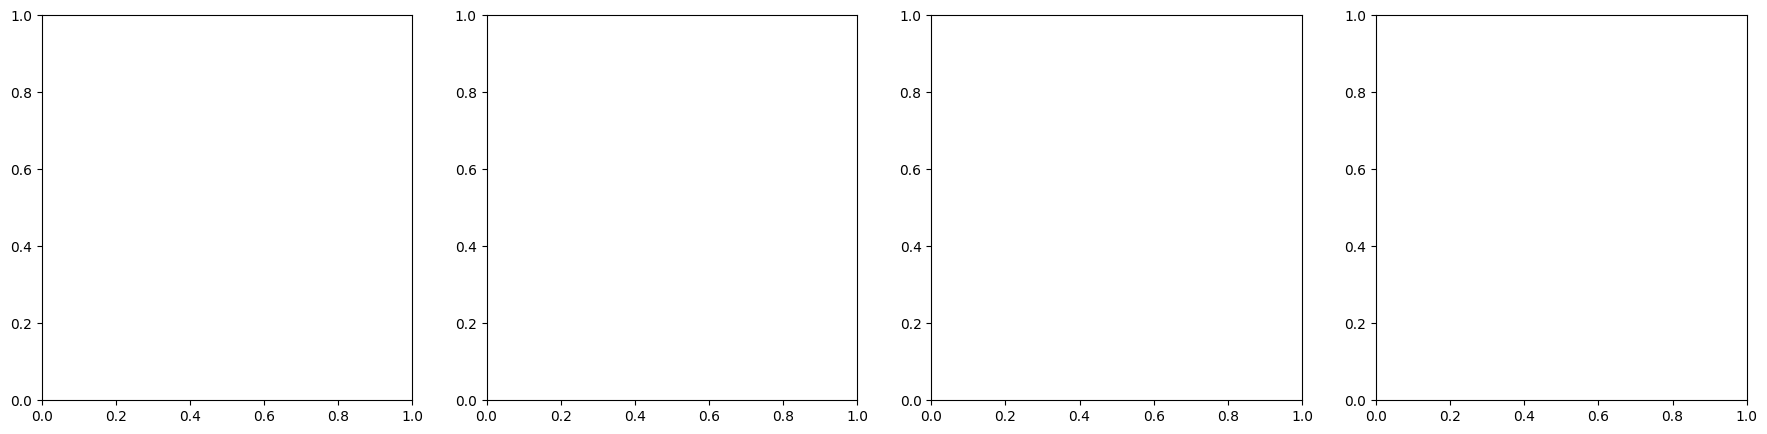

In [12]:
img = gdal.Open('NYC_Image.tif').ReadAsArray()
rgb = visualise_rgb(img,[0.3,0.3,0.3])

In [ ]:
rgb_1 = visualise_rgb(img,[0.15,0.15,0.15],display=True )


In [ ]:
img = gdal.Open('NYC_Image.tif').ReadAsArray()
rgb_2 = visualise_rgb(img,[0.3,0.3,0.3],display=True )


In [ ]:
img = gdal.Open('NYC_Image.tif').ReadAsArray()
rgb_3 = visualise_rgb(img,[0.45,0.45,0.45],display=True )